In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
#Information to build network size
Ntraining = int(input('How many training examples points were given?\n'))
RM = 1.0
RF0 = 1.0E-8 * RM
alpha = 1.1
b0 = 0
bf = 435
#number of beta values -1 (because we start at zero)

tops = 1
centered = 0

D =np.asarray(list(map(int, input('How big were the hidden layers?\nSeparate sizes for all examples by spaces\n').split())))
#This will run all of the examples done. So for x hidden layers, you can run y = [y1 y2 y3 y4...] size hidden layer examples simultaneousl

N= int(input('How many hidden layers?\n'))

How many training examples points were given?
50
How big were the hidden layers?
Separate sizes for all examples by spaces
20
How many hidden layers?
1


training examples points: 20
hidden layers: 5 20 30 40 50 100 200 300 400
Hidden layers: 1

In [3]:
#taking above information to build network with connectivity
structure = np.zeros((len(D), 2+N))
for i in range(len(D)):
    structure[i,1:-1]=np.repeat(D[i],N)
    #size of hidden layers
    
    structure[:,0] = 784
    #size of input layer
    
    structure[:,-1] = 10
    #size of output layer

Nbias = np.sum(structure[:,1:],axis=1)
Nweight = np.sum(structure[:,1:]*structure[:,:-1],axis = 1)

Nbeta = bf - b0 + 1
beta = np.linspace(b0, bf, Nbeta)
g = (RF0/RM * alpha**beta)

def sigmoid(x, W, b):
    linpart = np.dot(W, x) + b
    return 1.0 / (1.0 + np.exp(-linpart))

In [6]:
Action = np.zeros(len(D))
sorting= np.zeros(len(D))
for i in range(len(D)):
    sorting[i] = np.loadtxt('../boom/DH{0}_{1}ex/sorted_indices.dat'.format(D[i],Ntraining))[-1,0]
    #second index tells you to which path you're interested in. 0 gives lowest, -1 gives highest
    #first index tells you that we want biggest beta value

sorting = sorting.astype(int)

for i in range(len(D)):
    Action[i] = np.load('../boom/DH{0}_{1}ex/action_errors_{2}.npy'.format(D[i], Ntraining, sorting[i]+1))[-1,1]
    #First index tells you that we want biggest beta value
    #second index is just the scaling type (set by Paul in the output of his Varanneal)

In [7]:
xtest_intot = np.load("../data_from_sharedrive/imtrain_noisy_[1, 7].npy")
xtest_outtot = np.load("../data_from_sharedrive/labtrain_noisy_[1, 7].npy")

numberpredict = 1000
error = np.zeros(len(D))

for i in range(len(D)):
    for z in np.arange(Ntraining+1,Ntraining+1+numberpredict):
        # Load estimated parameters
        levelidx = sorting[i]  # init index of i-th action level
        #levelidx = 0  # manually set init index

        # Load estimated weights and biases for 
        W = np.load("../boom/DH{0}_{1}ex/W_{2}.npy".format(D[i], Ntraining, levelidx + 1), encoding = 'latin1')
        b = np.load("../boom/DH{0}_{1}ex/b_{2}.npy".format(D[i], Ntraining, levelidx + 1), encoding = 'latin1')

    # Predict against the test example
    #x = np.copy(xtest_in)

        total = numberpredict -Ntraining
        done = z - Ntraining
        
        xtest_in = np.reshape(xtest_intot[z], (784,))
        xtest_out = xtest_outtot[z]

        x = np.copy(xtest_in)
        xpred_out = xtest_out
        for n in range(N+1):
            x = sigmoid(x, W[-1, n], b[-1, n])
        xpred_in = np.copy(xtest_in)
        xpred_out = np.vstack((xpred_out,x))
        if z == Ntraining+1:
            predictlabel = [xpred_out[[0,-1],:]]
            dataused = [x]
        else:
            predictlabel = np.vstack((predictlabel,[xpred_out[[0,-1],:]]))
            dataused = np.vstack((dataused,[x]))
    machineoutput = predictlabel[:,1]
    correctoutput = predictlabel[:,0]
    machineoutput = np.exp(machineoutput)-1
    normalization = np.reshape(np.sum(machineoutput, axis = 1), (numberpredict,1))
    machineoutput_normalized = np.divide(machineoutput, normalization)
    error[i] = np.divide(np.sum(np.square(np.subtract(machineoutput_normalized, correctoutput))),numberpredict*10)
    print('finished the example with {0} neurons in the hidden layer\n'.format(D[i]))

finished the example with 20 neurons in the hidden layer



In [8]:
np.savetxt('../boom/DH-20ex-{0}test-bigaction.txt'.format(numberpredict),D)
np.savetxt('../boom/PE-20ex-{0}test-bigaction.txt'.format(numberpredict),error)
np.savetxt('../boom/Action-20ex-{0}test-bigaction.txt'.format(numberpredict),Action)

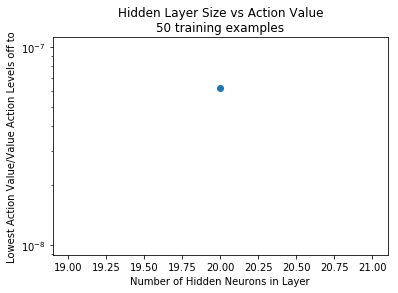

In [9]:
plt.plot(D, Action, 'o')
plt.yscale('log')
plt.xlabel('Number of Hidden Neurons in Layer')
plt.ylabel('Lowest Action Value/Value Action Levels off to')
plt.title('Hidden Layer Size vs Action Value\n{0} training examples'.format(Ntraining))
plt.savefig('../results_from_sharedrive/adapt_mnist_N3/ActionVsDH_{0}ex.png'.format(Ntraining))
plt.show()

In [10]:
#calculates error from random guess

test = np.array([0.5, 0.5, 0.5, 0.5,0.5,0.5,0.5,0.5,0.5,0.5])
test = np.exp(test)-1
test_norm = np.sum(test)
test = np.divide(test,test_norm)
testerror = np.divide(np.sum(np.square(np.subtract(test, np.array([1, 0, 0, 0,0,0,0,0,0,0])))), 10)
print(testerror)

0.09


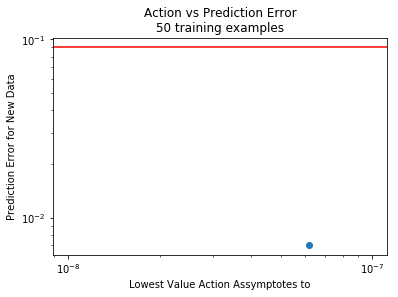

In [11]:
plt.plot(Action, error,'o')
plt.xlabel('Lowest Value Action Assymptotes to')
plt.ylabel('Prediction Error for New Data')
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=testerror, color = 'r')
plt.title('Action vs Prediction Error\n{0} training examples'.format(Ntraining))
plt.savefig('../results_from_sharedrive/adapt_mnist_N3/ErrorVsAction_{0}ex.png'.format(Ntraining))
plt.show()

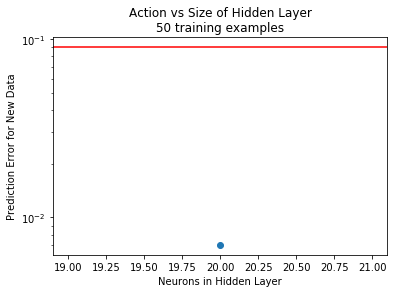

In [12]:
plt.plot(D, error,'o')
plt.xlabel('Neurons in Hidden Layer')
plt.ylabel('Prediction Error for New Data')
plt.yscale('log')
plt.title('Action vs Size of Hidden Layer\n{0} training examples'.format(Ntraining))
plt.axhline(y=testerror, color = 'r')
plt.savefig('../results_from_sharedrive/adapt_mnist_N3/ErrorVsDH_{0}ex.png'.format(Ntraining))
plt.show()